In [1]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
%matplotlib inline

In [3]:
files = glob.glob('./digitised models/*.csv')
df_list = []
for file_name in files:
    df = pd.read_csv(file_name, sep=',')
    df_list.append(df)

In [4]:
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(files))-1)

timestep=np.arange(0,len(files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

In [6]:
files=os.listdir('./digitised models')
holes= [x[:-10] for x in files]

Text(0,0.5,'Depth Below Sea Floor (m)')

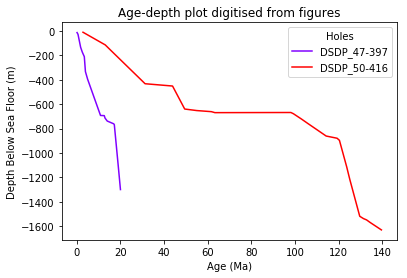

In [13]:
for i in np.arange(0,len(df_list),1):
    plt.plot(df_list[i]['Age (Ma)'], df_list[i]['Depth (mbsf)']*-1, label=holes[i], c=c[i])
plt.legend(title='Holes')#,loc='lower right',bbox_to_anchor=(1.5, -0.6))
plt.title('Age-depth plot digitised from figures')
plt.xlabel('Age (Ma)')
plt.ylabel('Depth Below Sea Floor (m)')

Text(0.5,0,'Age (Ma)')

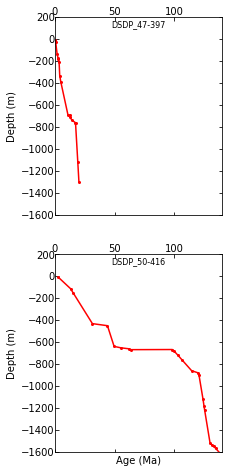

In [14]:
fs=8
ms=2
fig, axs = plt.subplots(len(files),1, figsize=(7.5/2.5, 8))
    
for i in np.arange(0,len(files),1):
    ax = axs[i]
    ax.plot(df_list[i]['Age (Ma)'], df_list[i]['Depth (mbsf)']*-1, '-o', label=holes[i], c='r', markersize=ms)
    ax.set_title(str(holes[i]), pad=-10, fontsize=fs)
    ax.tick_params(axis='both', which='both', direction='in', labeltop=True, labelbottom=False, pad=0.1, top=True, right=True)
    ax.set_xlim(0,140)
    ax.set_ylim(-1600,200)
    ax.set_ylabel('Depth (m)')

axs[len(files)-1]
ax.set_xlabel('Age (Ma)')